In [790]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [791]:
#Datei einlesen
df = pd.read_csv("heart3.csv")
#df = pd.read_csv("/Users/aurelia/Documents/GitHub/Asai-Projekt/heart3.csv")
df_orginal = df.copy()

In [792]:
#DataFrame-Beispiel Daten
styled_df = df.head(10).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})

styled_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.000000,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.000000,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.000000,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.500000,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.000000,Up,0


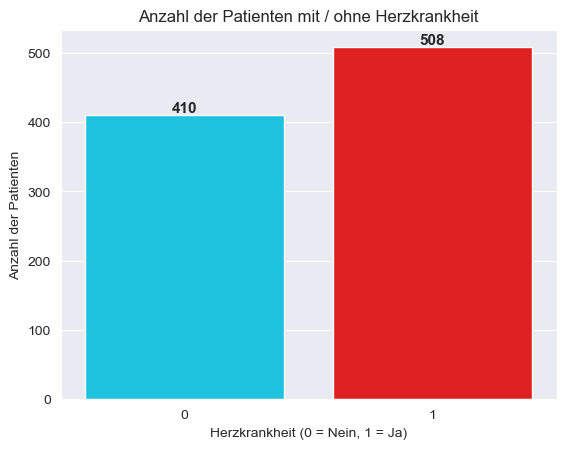

Anzahl der Zeilen (Patienten): 918
Anzahl der Spalten (Features): 12


In [793]:
#Balkendiagramm Anteil Herzerkrankte

# Balkendiagramm OHNE FutureWarning
ax = sns.countplot(x='HeartDisease', hue='HeartDisease', data=df, palette=['#00d9ff', '#ff0000'], legend=False)


# Achsentitel
plt.title('Anzahl der Patienten mit / ohne Herzkrankheit')
plt.xlabel('Herzkrankheit (0 = Nein, 1 = Ja)')
plt.ylabel('Anzahl der Patienten')

# Zahlen über Balken schreiben
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')

# Plot anzeigen
plt.show()
print(f"Anzahl der Zeilen (Patienten): {df.shape[0]}")
print(f"Anzahl der Spalten (Features): {df.shape[1]}")

In [794]:
# Daten Vorverarbeitung
# Duplikate checken
# Alle duplizierten Zeilen (inkl. Erstvorkommen)
duplikate_df = df[df.duplicated(keep=False)]

# Anzahl und Prozent Duplikate
anzahl_duplikate = len(duplikate_df)
gesamt = len(df)
prozent_duplikate = (anzahl_duplikate / gesamt) * 100

# Verteilung HeartDisease in den Duplikaten
verteilung_duplikate = duplikate_df['HeartDisease'].value_counts(normalize=True) * 100

# Verteilung HeartDisease im gesamten DataFrame
verteilung_gesamt = df['HeartDisease'].value_counts(normalize=True) * 100

# Ausgabe
print("Gesamtzeilen:", gesamt)
print("Anzahl mehrfach vorkommender Zeilen:", anzahl_duplikate)
print(f"Prozent mehrfach vorkommend: {prozent_duplikate:.2f}%\n")

print("Verteilung von Heartdisease innerhalb der Duplikate:")
if not verteilung_duplikate.empty:
    for wert, proz in verteilung_duplikate.items():
        print(f"  {wert}: {proz:.2f}%")
else:
    print("    - - -")

print("\nGesamtverteilung HeartDisease:")
for wert, proz in verteilung_gesamt.items():
    print(f"  {wert}: {proz:.2f}%")

Gesamtzeilen: 918
Anzahl mehrfach vorkommender Zeilen: 0
Prozent mehrfach vorkommend: 0.00%

Verteilung von Heartdisease innerhalb der Duplikate:
    - - -

Gesamtverteilung HeartDisease:
  1: 55.34%
  0: 44.66%


In [795]:
# Duplikate entfernen
df = df.drop_duplicates()


In [796]:
# Fehlende Werte prüfen
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [797]:
# Typprüfung
# also ob wirklich die im Datensatz angegebenen Datentypen und beizeichnungen stimmen
def check_values(df, column_type, valid_values):
    if column_type not in df.columns:
        print(f"Spalte '{column_type}' nicht im Datensatz gefunden.")
        return

    values = df[column_type].dropna().unique()
    invalid = set(values).difference(set(valid_values))
    if invalid:
         print(f" Ungültige Werte in Spalte '{column_type}': {(invalid)} ")
    else:
        print(f"Alle Werte in Spalte '{column_type}' sind gültig ")

valid_values_dict = {
    "Sex": {'M', 'F'},
    "ChestPainType": {'TA', 'ATA', 'NAP', 'ASY'},
    "RestingECG": {'Normal', 'ST', 'LVH'},
    "ExerciseAngina": {'Y', 'N'},
    "ST_Slope": {'Up', 'Flat', 'Down'}
}
def check_if_numeric (df, column_type, valid_values):
    if column_type not in df.columns:
        print(f"Spalte {column_type}' nicht im Datensatz gefunden.")
        return
    else:
        non_numeric = df[column_type].dropna().apply(lambda x: not isinstance(x, (int, float)))
        if non_numeric.any():
            count_invalid = non_numeric.sum()
            print(f"{count_invalid} nicht numerische Werte in Spalte '{column_type}'")
            print(f"Beispiele: {df[column_type][non_numeric].unique()[:5]}")
        else:
            print(f"Alle Werte in Spalte '{column_type}' sind numerisch.")

numeric_columns = [
    'Age',
    'RestingBP',
    'Cholesterol',
    'FastingBS',
    'MaxHR',
    'Oldpeak',
    'HeartDisease'
]
# Anwendung:
for column, valid_set in valid_values_dict.items():
    check_values(df, column, valid_set)

for col in numeric_columns:
    check_if_numeric(df, col, numeric_columns)

Alle Werte in Spalte 'Sex' sind gültig 
Alle Werte in Spalte 'ChestPainType' sind gültig 
Alle Werte in Spalte 'RestingECG' sind gültig 
Alle Werte in Spalte 'ExerciseAngina' sind gültig 
Alle Werte in Spalte 'ST_Slope' sind gültig 
Alle Werte in Spalte 'Age' sind numerisch.
Alle Werte in Spalte 'RestingBP' sind numerisch.
Alle Werte in Spalte 'Cholesterol' sind numerisch.
Alle Werte in Spalte 'FastingBS' sind numerisch.
Alle Werte in Spalte 'MaxHR' sind numerisch.
Alle Werte in Spalte 'Oldpeak' sind numerisch.
Alle Werte in Spalte 'HeartDisease' sind numerisch.


In [798]:
# Unrealistische Werte
limits = {
    'Age': (0, 120),
    'RestingBP': (40, 150),
    'Cholesterol': (1, 800),
    'MaxHR': (60, 202),
    'Oldpeak': (0, 5)
}

print(f"Anzahl an Zeilen (vorher): {len(df)}")

def show_outliers(df, limits_dict):
    for col, (min_val, max_val) in limits_dict.items():
        invalid = df[(df[col] < min_val) | (df[col] > max_val)][col]
        print(f"{col}: {len(invalid)} Werte außerhalb ({min_val}–{max_val})")
        if not invalid.empty:
            print(f"    Beispiele: {invalid.unique()[:5]}")


def remove_outliers(df, limits_dict):
    condition = pd.Series([True] * len(df))
    for col, (min_val, max_val) in limits_dict.items():
        condition &= df[col].between(min_val, max_val)

    return df[condition]

def clip_outliers(df, limits_dict):
    df_clipped = df.copy()
    for col, (min_val, max_val) in limits_dict.items():
        before = df_clipped[col]
        below = before < min_val
        above = before > max_val

        df_clipped[col] = before.clip(lower=min_val, upper=max_val)
    print("\nClipping angewenden:")
    df = df_clipped
    show_outliers(df, limits)
    return df_clipped

show_outliers(df, limits)
clip_outliers(df, limits)
print(f"\nNeue Anzahl an Zeilen (nach Filter): {len(df)}")

Anzahl an Zeilen (vorher): 918
Age: 0 Werte außerhalb (0–120)
RestingBP: 118 Werte außerhalb (40–150)
    Beispiele: [160 170 190 180 155]
Cholesterol: 172 Werte außerhalb (1–800)
    Beispiele: [0]
MaxHR: 0 Werte außerhalb (60–202)
Oldpeak: 15 Werte außerhalb (0–5)
    Beispiele: [-0.9 -2.6 -1.5 -0.1 -1. ]

Clipping angewenden:
Age: 0 Werte außerhalb (0–120)
RestingBP: 0 Werte außerhalb (40–150)
Cholesterol: 0 Werte außerhalb (1–800)
MaxHR: 0 Werte außerhalb (60–202)
Oldpeak: 0 Werte außerhalb (0–5)

Neue Anzahl an Zeilen (nach Filter): 918


=== Altersverteilung ===
count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64


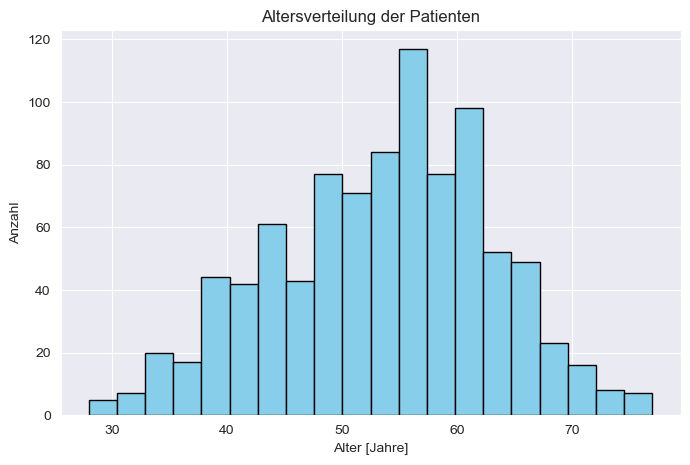

In [799]:
#Bias/Korrelation

print("=== Altersverteilung ===")
print(df['Age'].describe())

plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Altersverteilung der Patienten')
plt.xlabel('Alter [Jahre]')
plt.ylabel('Anzahl')
plt.show()

=== Geschlechterverteilung ===
M: 725 Patienten (78.98%)
F: 193 Patienten (21.02%)


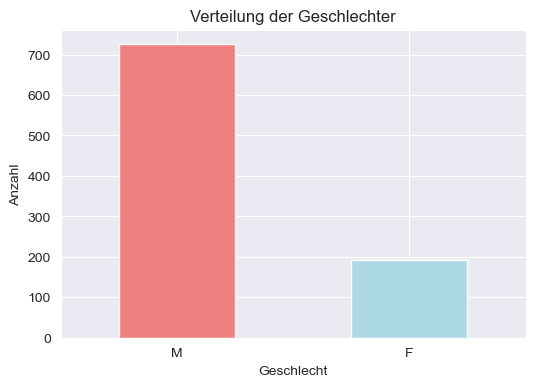

In [800]:
print("=== Geschlechterverteilung ===")
gender_counts = df['Sex'].value_counts()
gender_percent = df['Sex'].value_counts(normalize=True) * 100

for sex in gender_counts.index:
    print(f"{sex}: {gender_counts[sex]} Patienten ({gender_percent[sex]:.2f}%)")

plt.figure(figsize=(6,4))
gender_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Verteilung der Geschlechter')
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl')
plt.xticks(rotation=0)
plt.show()


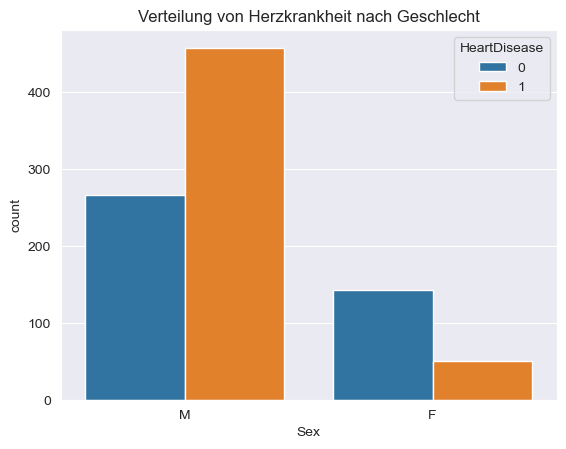

Sex
F    0.259067
M    0.631724
Name: HeartDisease, dtype: float64


In [801]:
# Bias: Zielverteilung nach Geschlecht
sns.countplot(data=df, x='Sex', hue='HeartDisease')
plt.title("Verteilung von Herzkrankheit nach Geschlecht")
plt.show()

# Diagnosewahrscheinlichkeit pro Geschlecht
print(df.groupby("Sex")["HeartDisease"].mean())

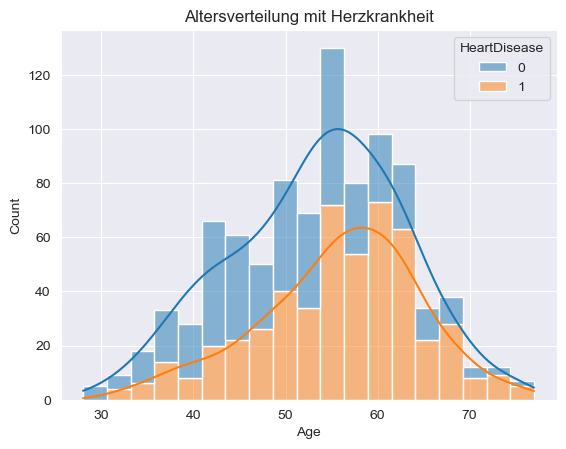

Age_cat
20–30    0.000000
31–40    0.363636
41–50    0.417040
51–60    0.582677
61–80    0.728507
Name: HeartDisease, dtype: float64


In [802]:
#Bias: Altersverteilung mit/ohne Herzkrankheit
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True, multiple='stack')
plt.title("Altersverteilung mit Herzkrankheit")
plt.show()

# Altersgruppenbildung für Analyse
df['Age_cat'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 80],
                        labels=["20–30", "31–40", "41–50", "51–60", "61–80"])
print(df.groupby("Age_cat", observed=True)["HeartDisease"].mean())


In [803]:
# Anteil Herzkrankheiten bei Fasting Blood Sugar hoch/niedrig
print(df.groupby("FastingBS")["HeartDisease"].mean())


FastingBS
0    0.480114
1    0.794393
Name: HeartDisease, dtype: float64


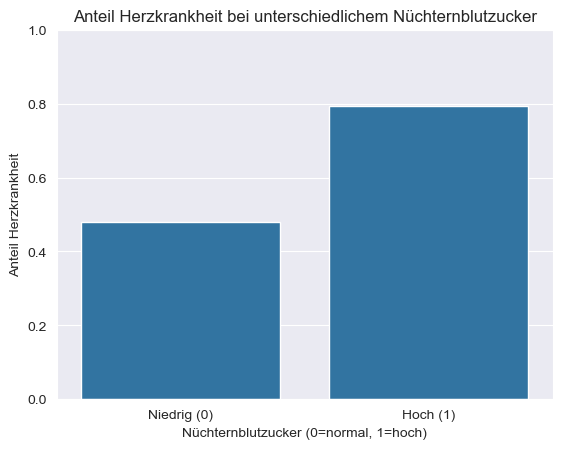

FastingBS
0    0.480114
1    0.794393
Name: HeartDisease, dtype: float64


In [804]:
# Anteil Herzkrankheiten pro Nüchternblutzucker
heart_disease_rate = df.groupby("FastingBS")["HeartDisease"].mean().reset_index()

# Plot mit Seaborn
sns.barplot(data=heart_disease_rate, x="FastingBS", y="HeartDisease")

plt.xticks([0, 1], ['Niedrig (0)', 'Hoch (1)'])
plt.ylabel("Anteil Herzkrankheit")
plt.xlabel("Nüchternblutzucker (0=normal, 1=hoch)")
plt.title("Anteil Herzkrankheit bei unterschiedlichem Nüchternblutzucker")
plt.ylim(0, 1)  # y-Achse von 0 bis 1
plt.show()

print(df.groupby("FastingBS")["HeartDisease"].mean())

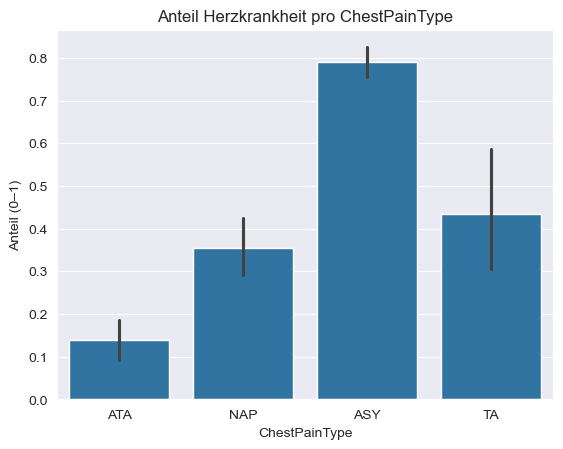

Anteil an Herzkrankheiten (%) pro ChestPainType:

ChestPainType
ASY    79.03
TA     43.48
NAP    35.47
ATA    13.87
Name: HeartDisease, dtype: float64


In [805]:
# Kreuztabelle: Anzahl Herzkrankheiten pro ChestPainType
#pd.crosstab(df['ChestPainType'], df['HeartDisease'], normalize='index') * 100

#  Anteil Herzkrankheit je ChestPainType
sns.barplot(
    data=df,
    x='ChestPainType',
    y='HeartDisease',
    estimator=lambda x: sum(x) / len(x)  # Mittelwert = Anteil Herzkrankheit
)
plt.title("Anteil Herzkrankheit pro ChestPainType")
plt.ylabel("Anteil (0–1)")
plt.show()

# Prozentsatz Herzkrankheit pro ChestPainType
heart_disease_by_cp = df.groupby("ChestPainType")["HeartDisease"].mean().sort_values(ascending=False) * 100

print("Anteil an Herzkrankheiten (%) pro ChestPainType:\n")
print(heart_disease_by_cp.round(2))

In [806]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Beispielhafte Feature-Liste (evtl. anpassen)
features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
            'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

# Kategorische Features umwandeln
df_encoded = pd.get_dummies(df[features], drop_first=True)
X = df_encoded
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Gesamtergebnis:")
print(classification_report(y_test, y_pred))


Gesamtergebnis:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       103
           1       0.90      0.91      0.90       127

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230



In [807]:
# Feature Engineering

# Resting BP
def restingBP_categorization(bp):
    if bp < 120:
        return 1
    elif 120<= bp <= 129:
        return 2
    elif 130<= bp <= 139:
        return 3
    elif 140<= bp <= 179:
        return 4
    else: return 5

df['RestingBP'] = df['RestingBP'].apply(restingBP_categorization)

# Cholesterol
def cholesterol_categorization(cholesterol):
    if cholesterol < 200:
        return 1
    elif 200<= cholesterol <= 239:
        return 2
    else: return 3

df['Cholesterol'] = df['Cholesterol'].apply(cholesterol_categorization)

# Max HR
def maxhr_age_category(row):
    maxhr = row['MaxHR']
    age = row['Age']
    expected_maxhr = 220 - age

    if maxhr < 0.7 * expected_maxhr:
        return 1
    elif 0.7 * expected_maxhr <= maxhr <= expected_maxhr:
        return 2
    elif expected_maxhr < maxhr <= 1.1 * expected_maxhr:
        return 3
    else:
        return 4

df['MaxHR'] = df.apply(maxhr_age_category, axis=1)

print(df['Age_cat'].unique())
def age_category(age_group):
    if age_group == '20–30':
        return 1
    elif age_group == '31–40':
        return 2
    elif age_group == '41–50':
        return 3
    elif age_group == '51–60':
        return 4
    elif age_group == '61–80':
        return 5
    else:
        return 0

df['Age_cat'] = df['Age_cat'].apply(age_category)

#One Hot Encoding bei Nominalen Kategorien
# One-Hot-Encoding für nominale Kategorien
df = pd.get_dummies(df, columns=["ChestPainType", "RestingECG", "ST_Slope"], drop_first=True, dtype=int)
"""
#ChestpainType
chest_pain_map = {
    "TA": 0,   # Typical Angina
    "ATA": 1,  # Atypical Angina
    "NAP": 2,  # Non-Anginal Pain
    "ASY": 3   # Asymptomatic
}

df["ChestPainType"] = df["ChestPainType"].map(chest_pain_map)

#Resting ECG
resting_ecg_map = {
    "Normal": 0,
    "ST": 1,
    "LVH": 2
}

df["RestingECG"] = df["RestingECG"].map(resting_ecg_map)

# ST_Slope
st_slope_map = {
    "Up": 0,
    "Flat": 1,
    "Down": 2
}

df["ST_Slope"] = df["ST_Slope"].map(st_slope_map)
"""

# Mapping für Sex (Männlich = 1, Weiblich = 0)
df["Sex"] = df["Sex"].map({'M': 1, 'F': 0})

# Mapping für ExerciseAngina (Ja = 1, Nein = 0)
df["ExerciseAngina"] = df["ExerciseAngina"].map({'Y': 1, 'N': 0})

styled_df = df.head(10).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})

styled_df

['31–40', '41–50', '51–60', '61–80', '20–30']
Categories (5, object): ['20–30' < '31–40' < '41–50' < '51–60' < '61–80']


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Age_cat,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,4,3,0,2,0,0.000000,0,2,1,0,0,1,0,0,1
1,49,0,4,1,0,2,0,1.000000,1,3,0,1,0,1,0,1,0
2,37,1,3,3,0,1,0,0.000000,0,2,1,0,0,0,1,0,1
3,48,0,3,2,0,1,1,1.500000,1,3,0,0,0,1,0,1,0
4,54,1,4,1,0,2,0,0.000000,0,4,0,1,0,1,0,0,1
5,39,1,2,3,0,2,0,0.000000,0,2,0,1,0,1,0,0,1
6,45,0,3,2,0,2,0,0.000000,0,3,1,0,0,1,0,0,1
7,54,1,1,2,0,2,0,0.000000,0,4,1,0,0,1,0,0,1
8,37,1,4,2,0,2,1,1.500000,1,2,0,0,0,1,0,1,0
9,48,0,2,3,0,1,0,0.000000,0,3,1,0,0,1,0,0,1


In [808]:
#Skalieren
scaler = MinMaxScaler()
scale_cols = ["ChestPainType", "RestingBP", "Cholesterol", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope", "Age_cat"]
df[scale_cols] = scaler.fit_transform(df[scale_cols])

styled_df = df.head(10).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})

styled_df

KeyError: "['ChestPainType', 'RestingECG', 'ST_Slope'] not in index"

In [789]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Daten vorbereiten
X = df.drop(columns=['HeartDisease', 'Age'])
y = df['HeartDisease']

# 2. Trainings-/Testdaten Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Parametergrid definieren
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# 4. Random Forest mit GridSearchCV
rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

# === 5. Bestes Modell anzeigen ===
print("Beste Parameterkombination:")
print(grid_search.best_params_)

# === 6. Modell evaluieren ===
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# === 7. Konfusionsmatrix ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot()
plt.show()


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Beste Parameterkombination:
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


NameError: name 'best_rf' is not defined